<a href="https://colab.research.google.com/github/kykytsapol/tets/blob/main/%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%BA%D0%BE%D0%B2%D0%B8%D0%B4%D0%B0_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pandas
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 82.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import nmf
from gensim import models

In [ ]:
# открываем экселевский файл. достаем из него столбцы с оригинальным текстом комментов и преобработтанами
comments = pandas.read_excel('комменты_предобработка_послековида1.xlsx', usecols = 'G, T')
comments

,snippet.textOriginal,Текста_на_предобработку
0,тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала э...,тайм код 0 10 флаг 0 25 начало эфир эхо москва...
1,Жаль до моргенштерна не добрались.,жаль моргенштерн добираться
2,"Невзоров в перерыве, говоря о Вассермане, сказ...",невзоров перерыв говорить вассерман настолько ...
3,"Многие удивляются, - а почему так быстро свари...",многие удивляться быстро сваривать вакцина при...
4,Спасибо! Про Дуню забавно. А что если и Вассер...,дуня забавно вассерман баба сиська борода похо...
...,...,...
54782,шанс всегда хорошо виден - распознать нетрудно...,шанс видный распознавать нетрудно трудно решаться
54783,Ю\n\n\n\n\n\n\n\n\n\nЮ,ю ю
54784,А сами расклад смотрите?????? Зачем???,расклад смотреть
54785,Та же самая история!!!,самый история


In [ ]:
#оставляем только русские слова 
import re

comments["Текста_на_предобработку"] = comments['Текста_на_предобработку'].apply(lambda x: str(x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"[^а-яА-ЯёЁ\s]", "", x))
comments["Текста_на_предобработку"]

0        тайм код   флаг   начало эфир эхо москва детск...
1                              жаль моргенштерн добираться
2        невзоров перерыв говорить вассерман настолько ...
3        многие удивляться быстро сваривать вакцина при...
4        дуня забавно вассерман баба сиська борода похо...
                               ...                        
54782    шанс видный распознавать нетрудно трудно решаться
54783                                                  ю ю
54784                                     расклад смотреть
54785                                        самый история
54786         благо дарить сердечно благо принимать сердце
Name: Текста_на_предобработку, Length: 54787, dtype: object

In [ ]:
# удаяем мусорные слова и имена 
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"свой", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"елена", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"анна", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ирина", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"муслим", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"людмила", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"татьяна", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"аня", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"алена", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"уэйт", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"кроуль", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ольга", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"лена", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"леночка", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"светлана", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"наталья", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"оксана", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"света", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"хова", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"хованский", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"юлик", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"юра", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ничто", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"никто", "", x))
#comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"власть", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"русский", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"народ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"юлия", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"казах", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"що", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"це", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"дивться", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"мия", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"як", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"вс ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"тинькофф", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ви ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"де ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"новий", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"буде", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"кожный", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"дивться", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ефр", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"анжела", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"рф", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"бот", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"еленная", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ссср", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"никто", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"кстати", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ухо", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"анжела", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ржаться", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"стан", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"марина", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" лать", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ть", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"бу ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" вже", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ной", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" изнять", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"питання", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"було", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"часть", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" нраться", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"дивться", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" аля", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" але", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"украинец", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"рожние", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ва", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" дить", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"прально", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"подрживать", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"украни", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" мамо", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"вдповд", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"вс ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"раа", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ко ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"иначе", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" укран ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ми ", "", x)) 
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ага ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" украна ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" украни ", "", x))

In [ ]:
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"киев", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" одесса ", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"харьков", "", x))

In [ ]:
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r"ага", "", x))
comments['Текста_на_предобработку'] = comments['Текста_на_предобработку'].apply(lambda x: re.sub(r" ть ", "", x))

In [ ]:
# Создаем датафрейм с предобработанным текстом 
data = pandas.DataFrame()
data.loc[:, "Текст_на_векторизацию"] = comments['Текста_на_предобработку']
data = data.dropna() # удаляем пропуски - уже можно 
data

,Текст_на_векторизацию
0,тайм код флаг начало эфир эхо москва детск...
1,жаль моргенштерн добираться
2,невзоров перерыв говоритьссерман настольпотряс...
3,многие удивляться быстро свариватькцина причем...
4,дуня забавноссерман баба сиська борода похоже ...
...,...
54782,шанс видный распознавать нетрудно трудно решаться
54783,ю ю
54784,расклад смотреть
54785,самый история


In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2, и словарь делаю не больше 10000 токенов
cvect = CountVectorizer(min_df=2, max_features=10000).fit(data["Текст_на_векторизацию"])
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
cmatrix = cvect.transform(data["Текст_на_векторизацию"])
# объект cmatrix оформляем как датафрейм
cmatrix_df = pandas.DataFrame(cmatrix.toarray(), columns = cvect.get_feature_names(), index=data.index)
cmatrix_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,аа,ааа,аааа,абдраимова,аби,або,аборт,абсолютно,абсолютный,абстрагироваться,...,ярость,ясно,ясновидение,ясновидящий,ясность,ясный,яха,яхта,ящик,яя
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#частотность токенов
cmatrix_df[:].sum().sort_values()

улыбчивый         4
памаг             4
припоминать       4
руководящий       4
свифт             4
               ... 
говорить       2757
украина        3362
карта          3687
благодарить    5224
расклад        5578
Length: 10000, dtype: int64

In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2
tfidf = TfidfVectorizer(min_df=2, max_features=10000).fit(data["Текст_на_векторизацию"])
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
tfidfmatrix = tfidf.transform(data["Текст_на_векторизацию"])
# объект cmatrix оформляем как датафрейм
tfidfmatrix_df = pandas.DataFrame(tfidfmatrix.toarray(), columns = tfidf.get_feature_names(), index=data.index)
tfidfmatrix_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,аа,ааа,аааа,абдраимова,аби,або,аборт,абсолютно,абсолютный,абстрагироваться,...,ярость,ясно,ясновидение,ясновидящий,ясность,ясный,яха,яхта,ящик,яя
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059467,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#частотность токенов
tfidfmatrix_df[:].sum().sort_values()

ангола            0.176735
киберпсих         0.243526
стенать           0.258570
захария           0.304784
коринфянин        0.314074
                  ...     
таро            531.832141
украина         599.758434
карта           642.373794
расклад        1066.002711
благодарить    1481.424769
Length: 10000, dtype: float64

In [ ]:
# Концертируем в лист
data = comments['Текста_на_предобработку'].values.tolist()

In [ ]:
# Преобразование документа в список токенов 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence))) 
data_words = list(sent_to_words(data))

In [ ]:
# Создаем словарь
id2word = corpora.Dictionary(data_words)

In [ ]:
# Создаем корпус
texts = data_words

In [ ]:
# Частота встречаемости 
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Смотрим 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 3), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

### Модель LSA

In [ ]:
from gensim.models import LsiModel
# модель LSA
lsa_model = gensim.models.LsiModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10)

In [ ]:
# согласованность LSA модели методом c_v
cm = CoherenceModel(model=lsa_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v')
coherence = cm.get_coherence()
coherence

0.5024350947967522

In [ ]:
# согласованность LSA модели методос u_mass
cm = CoherenceModel(model=lsa_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.5964388854214504

In [ ]:
# это функция, которая позволяет построить моедли с разным количеством топиков, посчитать и сохранить значение согласованности для моделей.
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LsiModel(corpus=corpus, num_topics=num_topics,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
# задаем значения наши
model_list, coherence_values = compute_coherence_values(dictionary=id2word,corpus=corpus,
                                                      texts=texts, start=2, limit=50, step=5)

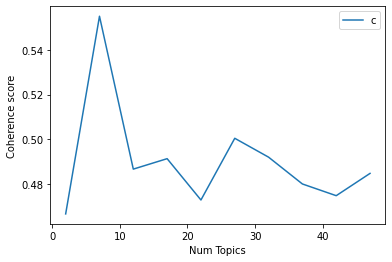

In [ ]:
# Сторим график, который показывает как изменяется значение согласованности при добавлении топика в модель.
limit=50; start=2; step=5;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Итак, как видно из рисунка выше модель LSA с 8 топиками имеет наивысшее значение согласованности. Построим данную модель,определим ее точное значение согласованности и посмотрим на получившиеся топики. 

In [ ]:
from gensim.models import LsiModel
# модель LSA
lsa_model = gensim.models.LsiModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8)

In [ ]:
lsa_model.print_topics()

[(0,
  '0.321*"расклад" + 0.265*"карта" + 0.210*"украина" + 0.209*"благодарить" + 0.190*"россия" + 0.169*"знать" + 0.166*"говорить" + 0.166*"понимать" + 0.161*"мир" + 0.155*"жить"'),
 (1,
  '-0.461*"украина" + -0.419*"россия" + 0.375*"расклад" + 0.308*"карта" + 0.296*"благодарить" + -0.241*"война" + -0.180*"мир" + -0.145*"страна" + 0.126*"таро" + -0.095*"жить"'),
 (2,
  '0.673*"карта" + -0.545*"благодарить" + 0.202*"таро" + 0.119*"вопрос" + -0.094*"любовь" + 0.088*"колода" + -0.086*"бог" + -0.083*"жить" + -0.073*"пусть" + -0.069*"ссылка"'),
 (3,
  '-0.380*"благодарить" + -0.367*"украина" + -0.296*"россия" + -0.234*"расклад" + 0.203*"знать" + 0.195*"жить" + 0.181*"ребенок" + 0.173*"бог" + -0.168*"карта" + 0.154*"любить"'),
 (4,
  '-0.656*"расклад" + 0.244*"карта" + 0.239*"ссылка" + 0.207*"уровень" + 0.150*"канал" + 0.138*"практика" + 0.138*"программа" + 0.137*"час" + 0.133*"спонсор" + 0.109*"серд"'),
 (5,
  '0.564*"благодарить" + -0.384*"расклад" + 0.243*"карта" + -0.217*"ссылка" + -0.1

In [ ]:
# согласованность LSA модели методом c_v
cm = CoherenceModel(model=lsa_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v')
coherence = cm.get_coherence()
coherence

0.5247351159256103

In [ ]:
# согласованность LSA модели методос u_mass
cm = CoherenceModel(model=lsa_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.548410961912804

Для модели LSA с 8 топиками согласованность, рассчитанная методом, c_v примерно равна 0,53, а методом u_mass - 3,55. Отрицательный знак появляется потому, метод u_mass использует логарифм для расчета согласованности. Кроме того, мы видим, что некоторые веса слов, которые отражают их значимость для темы, имеют отрицательный знак. Это означает, что данные слова совсем не свойственны даной теме. При большом объеме словаря, факт того, что слово совсем не свойственно данной усложняет интерпретацию - нам важно понять из каких слов состоит тема. В связи с этим, ряд авторов отмечает, что это является существенным недостатком модели LSA, который был устранен в более поздних моделях.

### Модель LDA

In [ ]:
# Строим LDA модель 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10) 

In [ ]:
# Перплексия (чем меньше значене тем лучше)
lda_model.log_perplexity(corpus)

-9.170194807094965

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=lda_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.4935227043772706

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=lda_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-5.2176222354181245

In [ ]:
# это функция, которая позволяет построить моедли с разным количеством топиков, посчитать и сохранить значение согласованности для моделей.
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
# задаем значения наши
model_list, coherence_values = compute_coherence_values(dictionary=id2word,corpus=corpus,
                                                      texts=texts, start=2, limit=50, step=5)

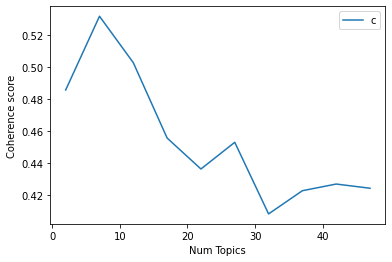

In [ ]:
# Сторим график, который показывает как изменяется значение согласованности при добавлении топика в модель.
limit=50; start=2; step=5;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Наивысшее значение согласованности наблюдается для модели с 8 топиками

In [ ]:
# Строим LDA модель 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8) 

In [ ]:
lda_model.print_topics()

[(0,
  '0.007*"март" + 0.007*"февраль" + 0.006*"карта" + 0.006*"прогноз" + 0.005*"выходить" + 0.005*"месяц" + 0.005*"тв" + 0.004*"апрель" + 0.004*"решение" + 0.004*"бред"'),
 (1,
  '0.019*"ребенок" + 0.017*"жить" + 0.012*"друг" + 0.011*"любить" + 0.010*"мужчина" + 0.010*"женщина" + 0.008*"деньги" + 0.008*"муж" + 0.007*"знать" + 0.007*"думать"'),
 (2,
  '0.034*"благодарить" + 0.015*"благо" + 0.014*"желать" + 0.014*"счастие" + 0.012*"бог" + 0.012*"давать" + 0.012*"сила" + 0.011*"здоровье" + 0.011*"любовь" + 0.010*"поток"'),
 (3,
  '0.017*"говорить" + 0.009*"игра" + 0.007*"знак" + 0.006*"язык" + 0.005*"ангел" + 0.005*"сила" + 0.005*"война" + 0.004*"заканчиваться" + 0.004*"скрывать" + 0.004*"точка"'),
 (4,
  '0.015*"понимать" + 0.013*"видеть" + 0.013*"говорить" + 0.009*"слово" + 0.009*"помогать" + 0.008*"верить" + 0.007*"знать" + 0.006*"идти" + 0.006*"бог" + 0.006*"душа"'),
 (5,
  '0.037*"расклад" + 0.019*"благодарить" + 0.018*"смотреть" + 0.015*"делать" + 0.011*"вопрос" + 0.011*"карта" + 

In [ ]:
# Перплексия (чем меньше значене тем лучше)
lda_model.log_perplexity(corpus)

-9.091515813711732

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=lda_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.5273403924092082

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=lda_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-4.499080148988135

Для модели LDA с 8 топиками согласованность, рассчитанная методом, c_v примерно равна 0,53, а методом u_mass - 0,53. Перплексия равна -9,09. Несмотря на то, что значения согласованности у модели LSA ненмого выше, она проигрывает модели LDA с точки зрения интерпретации. Для нас самое важное - это логчиность и удобство интерпретации получившихся топиков. 

### Модель NMF

In [ ]:
nmf_model = gensim.models.nmf.Nmf(corpus,id2word=id2word, num_topics=10)

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=nmf_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.658442436232242

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=nmf_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.2519685021126876

In [ ]:
# это функция, которая позволяет построить моедли с разным количеством топиков, посчитать и сохранить значение согласованности для моделей.
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.nmf.Nmf(corpus=corpus, num_topics=num_topics,id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
# задаем значения наши
model_list, coherence_values = compute_coherence_values(dictionary=id2word,corpus=corpus,
                                                      texts=texts, start=2, limit=50, step=5)

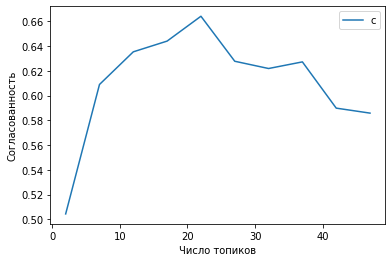

In [ ]:
# Сторим график, который показывает как изменяется значение согласованности при добавлении топика в модель.
limit=50; start=2; step=5;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Число топиков")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()

Максимальное значение согласованности достигается с включением 22 топиков.

In [ ]:
nmf_model = gensim.models.nmf.Nmf(corpus,id2word=id2word, num_topics=22)

In [ ]:
# согласованность LDA модели, c_v 
cm = CoherenceModel(model=nmf_model, corpus=corpus, texts=texts,
                              dictionary=id2word, coherence='c_v') # c_v Coherence Score
coherence = cm.get_coherence()
coherence

0.6202228028400826

In [ ]:
# согласованность LSA модели методом u_mass
cm = CoherenceModel(model=nmf_model, corpus=corpus,
                              dictionary=id2word, coherence='u_mass')
coherence = cm.get_coherence()
coherence

-3.6961098086232194

In [ ]:
nmf_model.print_topics()

[(10,
  '0.040*"сила" + 0.022*"высокий" + 0.017*"ждать" + 0.015*"понимать" + 0.014*"думать" + 0.013*"овиться" + 0.012*"видеть" + 0.012*"проходить" + 0.008*"семья" + 0.008*"помогать"'),
 (12,
  '0.045*"давать" + 0.035*"помогать" + 0.018*"счастие" + 0.017*"сделать" + 0.014*"желать" + 0.011*"душа" + 0.011*"умирать" + 0.009*"большой" + 0.007*"счастливый" + 0.007*"овиться"'),
 (13,
  '0.037*"страна" + 0.011*"видеть" + 0.011*"начинать" + 0.010*"будущее" + 0.009*"поэтому" + 0.008*"понимать" + 0.007*"происходить" + 0.006*"должный" + 0.006*"карта" + 0.006*"знание"'),
 (0,
  '0.072*"знать" + 0.060*"таро" + 0.013*"женщина" + 0.007*"поток" + 0.006*"прогноз" + 0.006*"таролог" + 0.006*"терапия" + 0.006*"смотреть" + 0.005*"вообще" + 0.005*"канал"'),
 (14,
  '0.058*"вопрос" + 0.037*"хороший" + 0.023*"самый" + 0.016*"ответ" + 0.011*"задавать" + 0.011*"видео" + 0.010*"думать" + 0.010*"отвечать" + 0.010*"информация" + 0.008*"начинать"'),
 (5,
  '0.042*"ребенок" + 0.024*"жить" + 0.015*"любовь" + 0.015*"др

Для модели NMF с 22 топиками согласованность, рассчитанная методом, c_v примерно равна 0,62, а методом u_mass - 3,69.

Далее необхомо выбрать между моделью LDA и NMF. Несмотря на то, что у модели NMF согласованность немного выше, чем у модели LDA, в качестве лучшей моделя я выбираю LDA. Это связано с тем, что получвшиеся топики с использованием модели LDA получились более логичными с точки зрения интерпретации. 

Далее проинтерпретируем 8 топиков модели LDA. 

In [ ]:
# еще добавим оригинальный текст к этой таблице 
comments1 = pandas.DataFrame()
comments1['Оригинальный_текст'] = comments['snippet.textOriginal']
comments1.dropna()
comments1.index = range(0, len(comments1))

In [ ]:
# Концертируем в лист
comments1 = comments['snippet.textOriginal'].values.tolist()

In [ ]:
#Тут мы определяем какой документ к какой теме преимущественно относится.
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=comments1):
    sent_topics_df = pandas.DataFrame()
    # Получаем каждый топик для каждого документа 
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Получите доминирующую тему, процентный вклад и ключевые слова для каждого документа
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => доминирующий топик 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pandas.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pandas.Series(texts)
    sent_topics_df = pandas.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=comments1)
# формат
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Номер_документа', 'Доминирующий_топик', 'Процентный_вклад', 'Ключевые_слова', 'Оригинальный_текст']
# смотрим
df_dominant_topic.head(10)

,Номер_документа,Доминирующий_топик,Процентный_вклад,Ключевые_слова,Оригинальный_текст
0,0,3.0,0.2696,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка",тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала эфира на 'Эхо Москвы' - про детский календарь (разв...
1,1,7.0,0.4600,"украина, россия, мир, война, страна, донбасс, земля, город, мирный, путин",Жаль до моргенштерна не добрались.
2,2,3.0,0.3711,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка","Невзоров в перерыве, говоря о Вассермане, сказал настолько потрясающую и проникающую речь, прост..."
3,3,3.0,0.4132,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка","Многие удивляются, - а почему так быстро сварили вакцины? Причём, во всём мире ... А недавно так..."
4,4,6.0,0.6349,"таро, канал, видео, карта, комментарий, поддерживать, ссылка, профиль, согласный, колода",Спасибо! Про Дуню забавно. А что если и Вассерман тоже баба с сиськами под бородой?! Похоже... А...
5,5,7.0,0.4287,"украина, россия, мир, война, страна, донбасс, земля, город, мирный, путин","Сколько же в стране несчастных людей, которые за чужой счёт самоутверждаются? Может их жалеть ну..."
6,6,4.0,0.6484,"понимать, видеть, говорить, слово, помогать, верить, знать, идти, бог, душа",Как легко деньги зарабатывать. Поговорил... Включил немного образования... Немного Ютуба... всё ...
7,7,2.0,0.3662,"благодарить, благо, желать, счастие, бог, давать, сила, здоровье, любовь, поток","Саня!! Глебыч... не стать мне в телефизор, но племяшки меня слушают.. хоть им голову поправлю"
8,8,1.0,0.7412,"ребенок, жить, друг, любить, мужчина, женщина, деньги, муж, знать, думать","Саня с ""шутками"" про морги, не знал, что ковидных мертвецов выдают с забитыми гробами ( хоронили..."
9,9,4.0,0.4065,"понимать, видеть, говорить, слово, помогать, верить, знать, идти, бог, душа","Если мы не хотим, чтобы нас опустили до положения кур на птицефабрике, мы должны намертво стоять..."


In [ ]:
df_dominant_topic['Преобразованный_текст'] = comments['Текста_на_предобработку']

In [ ]:
df_dominant_topic

,Номер_документа,Доминирующий_топик,Процентный_вклад,Ключевые_слова,Оригинальный_текст,Преобразованный_текст
0,0,3.0,0.2696,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка",тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала эфира на 'Эхо Москвы' - про детский календарь (разв...,тайм код флаг начало эфир эхо москва детский календарь развитие окно европа законопачиват...
1,1,7.0,0.4600,"украина, россия, мир, война, страна, донбасс, земля, город, мирный, путин",Жаль до моргенштерна не добрались.,жаль моргенштерн добираться
2,2,3.0,0.3711,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка","Невзоров в перерыве, говоря о Вассермане, сказал настолько потрясающую и проникающую речь, прост...",невзоров перерыв говоритьссерман настольпотрясать проникать речь великолепно
3,3,3.0,0.4132,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка","Многие удивляются, - а почему так быстро сварили вакцины? Причём, во всём мире ... А недавно так...",многие удивляться быстро свариватькцина причем мир удивляться появление новый штамм вирус удивля...
4,4,6.0,0.6349,"таро, канал, видео, карта, комментарий, поддерживать, ссылка, профиль, согласный, колода",Спасибо! Про Дуню забавно. А что если и Вассерман тоже баба с сиськами под бородой?! Похоже... А...,дуня забавноссерман баба сиська борода похоже дуня б кремль пусть спеть
...,...,...,...,...,...,...
54782,54782,4.0,0.5639,"понимать, видеть, говорить, слово, помогать, верить, знать, идти, бог, душа","шанс всегда хорошо виден - распознать нетрудно, трудно решиться",шанс видный распознавать нетрудно трудно решаться
54783,54783,0.0,0.1250,"март, февраль, карта, прогноз, выходить, месяц, тв, апрель, решение, бред",Ю\n\n\n\n\n\n\n\n\n\nЮ,ю ю
54784,54784,5.0,0.7083,"расклад, благодарить, смотреть, делать, вопрос, карта, хороший, знать, ответ, общий",А сами расклад смотрите?????? Зачем???,расклад смотреть
54785,54785,7.0,0.7080,"украина, россия, мир, война, страна, донбасс, земля, город, мирный, путин",Та же самая история!!!,самый история


In [ ]:
df_dominant_topic.to_excel('доминирующие_топики_послековида.xlsx')

In [ ]:
# смотрим сколько докумнтов попало в каждую тему
df_dominant_topic['Доминирующий_топик'].value_counts()

2.0    9089
5.0    8384
0.0    7882
1.0    7516
7.0    6916
4.0    6508
6.0    4482
3.0    4010
Name: Доминирующий_топик, dtype: int64

In [ ]:
# Наиболее связаные текста с топиками

pandas.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pandas.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pandas.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
  
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9796,"март, февраль, карта, прогноз, выходить, месяц, тв, апрель, решение, бред",Январь - Король мечей\nФевраль - Суд\nМарт - Король жезлов+Паж чаш\nАпрель - Паж мечей+Четвёрка ...
1,1.0,0.9416,"ребенок, жить, друг, любить, мужчина, женщина, деньги, муж, знать, думать","Я бы хотела ,что бы,его семья отвечала за его поступок. Он подонок!!!Взяв от меня денег тратил д..."
2,2.0,0.9583,"благодарить, благо, желать, счастие, бог, давать, сила, здоровье, любовь, поток","БЛАГОДАРЮ ВАС АННА ЗА ПРЕКРАСНЫЙ РАСКЛАД!❤ БЛАГОДАРЮ ГЕКАТУ ЗА ИНФОРМАЦИЮ , ПОМОЩЬ И ПОДДЕРЖКУ!..."
3,3.0,0.9374,"говорить, игра, знак, язык, ангел, сила, война, заканчиваться, скрывать, точка",Всегда было так...Цинга...холера ....чума...испанка...туберкулез...рак...лечим одно...появляется...
4,4.0,0.9539,"понимать, видеть, говорить, слово, помогать, верить, знать, идти, бог, душа","Дай Бог , что бы его душа почувствовала ваш рассклад... Дай Бог вам Божьей Благодати... а в след..."
5,5.0,0.9619,"расклад, благодарить, смотреть, делать, вопрос, карта, хороший, знать, ответ, общий",Да. Я хотела бы узнать почему мне изменяли мужчины. Почему я одна? Так должно быть или это венец...
6,6.0,0.9453,"таро, канал, видео, карта, комментарий, поддерживать, ссылка, профиль, согласный, колода","Медалист, есть одна фича. Короч призрака можно найти по раскиданным предметам. Если ты подходишь..."
7,7.0,0.9539,"украина, россия, мир, война, страна, донбасс, земля, город, мирный, путин","Я из Украины, центр. Анжела, это не операция, это-война! Настоящая война, взрывы, стрельба, кров..."


In [ ]:
# открываем экселевский файл. достаем из него столбцы с оригинальным текстом комментов и преобработтанами
sent_topics_sorteddf_mallet.to_excel('доминирующий_текст_после_ковида.xlsx')